In [35]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [36]:
import keras
import tensorflow as tf
import numpy as np

print(keras.__version__)
print(tf.__version__)

3.3.3
2.15.0


In [37]:
import tensorflow_datasets as tfds
from keras import layers
import keras
import matplotlib.pyplot as plt


In [8]:
!pip install --upgrade keras

In [38]:
print(keras.__version__)

3.3.3


In [39]:
# cats and dogs classifier

train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    split = ["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,
)

In [40]:
print(f"Number of training samples: {train_ds.cardinality()}")
print(f"Number of testing samples: {test_ds.cardinality()}")
print(f"Number of validation samples: {validation_ds.cardinality()}")

Number of training samples: 9305
Number of testing samples: 2326
Number of validation samples: 2326


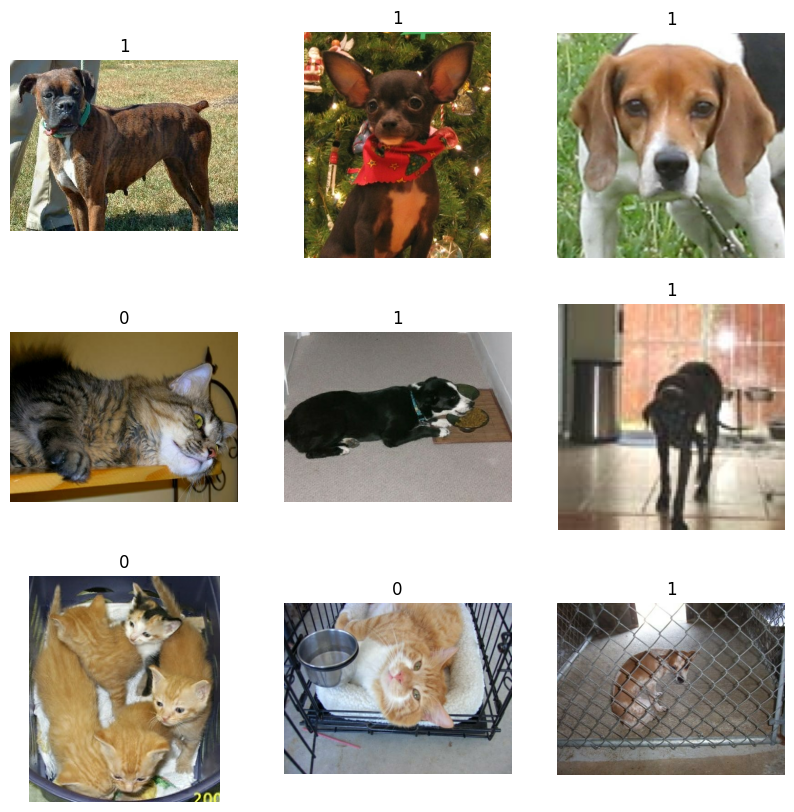

In [41]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [15]:
resized_img= keras.layers.Resizing(150, 150)

In [42]:
train_ds = train_ds.map(lambda x, y: (resized_img(x), y))
test_ds = test_ds.map(lambda x, y: (resized_img(x), y))
validation_ds = validation_ds.map(lambda x, y: (resized_img(x), y))

In [43]:
# data augmentation

def data_augmentation(x):
  for layer in augmentation_layer:
    x = layer(x)

  return x;

augmentation_layer = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
]


In [44]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

In [45]:
from tensorflow import data as tf_data

batch_size = 64

train_ds = train_ds.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()
validation_ds = validation_ds.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()
test_ds = test_ds.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()

In [46]:
print(resized_train_ds.shape)

AttributeError: 'CacheDataset' object has no attribute 'shape'

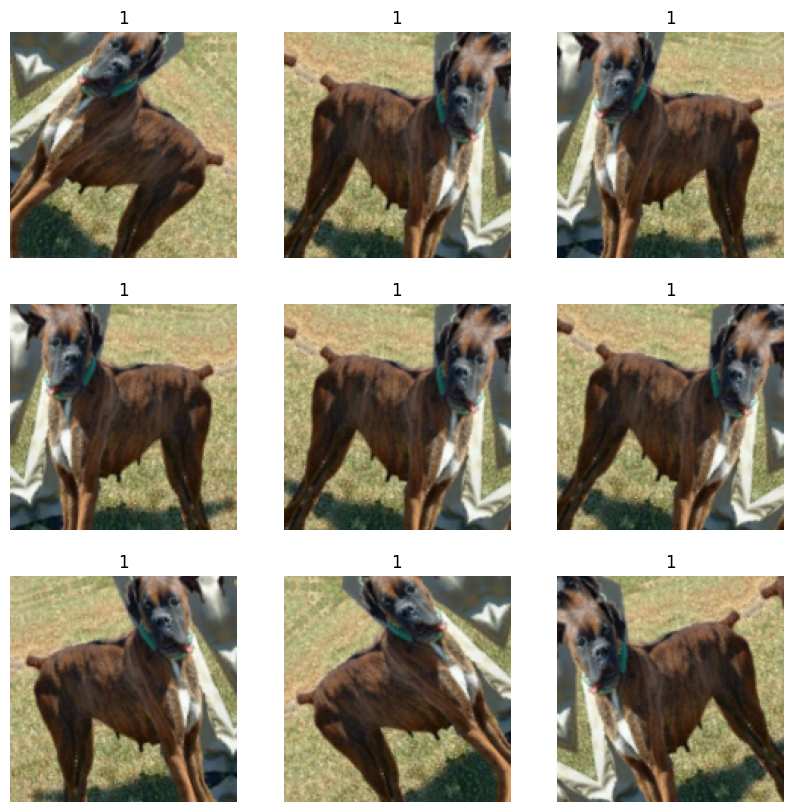

In [47]:
import numpy as np
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(np.expand_dims(first_image, 0))
        plt.imshow(np.array(augmented_image[0]).astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

In [48]:
# Building the model

# using xceptionNet

base_model = keras.applications.Xception(
    weights="imagenet",
    input_shape = (150, 150, 3),
    include_top=False
)

# freeze the base model
base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

scaled_layer = keras.layers.Rescaling(scale = 1/127.5, offset = -1)
x = scaled_layer(inputs)



In [49]:
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(1, name="output_layer")(x)

model = keras.Model(inputs, outputs)


In [50]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 5, 5, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [51]:
model.summary(show_trainable=True)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_5 (InputLayer)          │ (None, 150, 150, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ rescaling_2 (Rescaling)             │ (None, 150, 150, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ xception (Functional)               │ (None, 5, 5, 2048)           │    20,861,480 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ global_average_pooling2d_1          │ (None, 2048)                 │             0 │    -    │
│ (GlobalAveragePooling2D)            │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dropout_1 (Dropout)                 │ (None, 2048)                 │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ output_layer (Dense)                │ (None, 1)                    │         2,049 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [54]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = [keras.metrics.BinaryAccuracy()],
)

epochs = 2

In [53]:
print("Fitting the top layer of the model")
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Fitting the top layer of the model
Epoch 1/2
146/146 ━━━━━━━━━━━━━━━━━━━━ 88s 533ms/step - binary_accuracy: 0.8826 - loss: 0.2625 - val_binary_accuracy: 0.9656 - val_loss: 0.0881
Epoch 2/2
146/146 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - binary_accuracy: 0.9494 - loss: 0.1230 - val_binary_accuracy: 0.9695 - val_loss: 0.0789


In [55]:
base_model.trainable = True
model.summary(show_trainable=True)

model.compile(
    optimizer = keras.optimizers.Adam(1e-5),
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = [keras.metrics.BinaryAccuracy()],
)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_5 (InputLayer)          │ (None, 150, 150, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ rescaling_2 (Rescaling)             │ (None, 150, 150, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ xception (Functional)               │ (None, 5, 5, 2048)           │    20,861,480 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ global_average_pooling2d_1          │ (None, 2048)                 │             0 │    -    │
│ (GlobalAveragePooling2D)            │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dropout_1 (Dropout)                 │ (None, 2048)                 │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ output_layer (Dense)                │ (None, 1)                    │         2,049 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 20,809,001 (79.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [56]:
epochs = 1
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

146/146 ━━━━━━━━━━━━━━━━━━━━ 161s 635ms/step - binary_accuracy: 0.8589 - loss: 0.3515 - val_binary_accuracy: 0.9635 - val_loss: 0.0982


In [62]:
print("Testing the dataset: ")
testing = model.evaluate(test_ds)

Testing the dataset: 
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - binary_accuracy: 0.9579 - loss: 0.0923


In [64]:
print(f"Model accuracy: {testing[1] * 100:.2f}%")
print(f"Model loss: {testing[0]}%")


Model accuracy: 95.66%
Model loss: 0.10175631195306778%


In [66]:


# Make a prediction
prediction = model.predict(test_ds)

# Print the prediction
print(f"Prediction: {prediction}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step
Prediction: [[-5.408614 ]
 [ 6.007955 ]
 [ 7.13002  ]
 ...
 [ 6.0908747]
 [-5.3252025]
 [-3.4351335]]
